<a href="https://colab.research.google.com/github/heasun0111/Machine-learning/blob/master/CNN%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 0001 Loss: 2.307 Accuracy = 12.0000000
Epoch: 0002 Loss: 2.306 Accuracy = 10.0000000
Epoch: 0003 Loss: 2.311 Accuracy = 10.0000000
Epoch: 0004 Loss: 2.303 Accuracy = 11.0000000
Epoch: 0005 Loss: 2.305 Accuracy = 14.0000000
Epoch: 0006 Loss: 2.306 Accuracy = 10.0000000
Epoch: 0007 Loss: 2.303 Accuracy = 17.0000000
Epoch: 0008 Loss: 2.300 Accuracy = 9.0000000
Epoch: 0009 Loss: 2.306 Accuracy = 7.0000000
Epoch: 0010 Loss: 2.301 Accuracy = 12.0000000
Epoch: 0011 Loss: 2.301 Accuracy = 10.0000000
Epoch: 0012 Loss: 2.298 Accuracy = 14.0000000
Epoch: 0013 Loss: 2.310 Accuracy = 9.0000000
Epoch: 0014 Loss: 2.303 Accuracy = 7.0000000
Epoch: 0015 Loss: 2.303 Accuracy = 7.0000000
Epoch: 0016 Loss: 2.298 Accuracy = 11.0000000
Epoch: 0017 Loss: 2.299 Accuracy = 13.0000000
Epoch: 0018 Loss: 2.302 Accuracy = 11.0000000
Epoch: 0019 Loss: 2.300 Accuracy = 12.0000000
Epoch: 0020 Loss: 2.297 Accuracy = 14.0000000
Epoch: 0021 Loss: 2.293 Accuracy = 19.0000000
Epoch: 0022 Loss: 2.304 Accuracy = 15.0

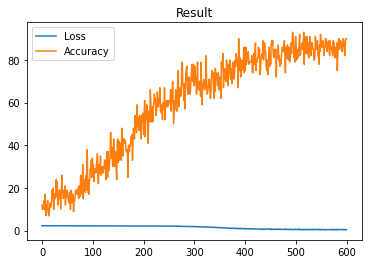

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim

batch_size = 100
lr = 0.01
training_epoch = 15

download_root = './MNIST_DOWNLOAD'
dataset = datasets.MNIST(
    download_root, transform=transforms.ToTensor(), train=True, download=True)

train_data = datasets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = datasets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        #self.conv3 = nn.Conv2d(in_channels=50, out_channels=70, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        #x = F.relu(self.conv3(x))
        #x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


    
'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x1 = self.fc1(x)
        x2 = self.relu(x1)
        x3 = self.fc2(x2)
        x4 = self.relu(x3)
        x5 = self.fc3(x4)
        return x5
        
'''

''' 
images = dataset.data[:100].view(100, 784)
images = images.type(torch.FloatTensor)
labels = dataset.targets[:100]
'''   

cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

cnn.train()

epochs=[]
losses=[]
accuracy=[]


for index, (data, target) in enumerate(train_loader):
    correct=0  
    optimizer.zero_grad()
    pred = cnn.forward(data)
    output = cnn(data)
    loss = criterion(output, target)
    percent=pred.data.numpy()    
    loss.backward()
    optimizer.step()

    for i in range(batch_size):
        if(np.argmax(percent[i]) == int(target[i])):
            correct +=1
    
    epochs.append(int(format(index+1)))
    losses.append(float(format(loss)))
    accuracy.append(float(format(correct/batch_size*100)))
    
    '''
    plt.plot(losses)
    plt.plot(accuracy)
    plt.title('Result')
    plt.legend(['Loss','Accuracy'])
    plt.show()
    '''   
    print('Epoch:', '%04d' % (index+1), 'Loss:', '{:.3f}'.format(loss), 'Accuracy =', '{:.7f}'.format(correct/batch_size*100))
    

print('Learning finished')

cnn.eval()


plt.plot(losses)
plt.plot(accuracy)
plt.title('Result')
plt.legend(['Loss','Accuracy'])
plt.show()
  